#### import libraries

In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
 
%matplotlib inline 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

#### connect to the sqlLite database

In [34]:
conn = sqlite3.connect(fruit_data.db)
cursor = conn.cursor()

In [35]:
conn

In [36]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS fruit (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [37]:
sales_data = [
    ('Apple', 10, 50),
    ('Banana', 20, 30),
    ('Orange', 15, 35),
    ('Apple', 5, 25),
    ('kiwi', 10, 15),
    ('pipeapple',5,30),
]

cursor.executemany('INSERT INTO fruit (product, quantity, price) VALUES (?, ?,? )',sales_data)
conn.commit()

In [38]:
df=pd.read_sql_query("select * from fruit",conn)
df

,id,product,quantity,price
0,1,Apple,10,50.0
1,2,Banana,20,30.0
2,3,Orange,15,35.0
3,4,Apple,5,25.0
4,5,kiwi,10,15.0
5,6,pipeapple,5,30.0


In [39]:
a=input("Enter a letter")
query="select * from fruit where product like '{}%'"
pd.read_sql_query(query.format(a),conn)

Enter a letter Apple


,id,product,quantity,price
0,1,Apple,10,50.0
1,4,Apple,5,25.0


In [40]:
query = '''
select product, 
       SUM(quantity) AS total_quantity, 
       SUM(quantity * price) AS total_revenue
FROM fruit
GROUP BY product
'''
df = pd.read_sql_query(query, conn)

In [41]:
df# total_revenue from fruits

,product,total_quantity,total_revenue
0,Apple,15,625.0
1,Banana,20,600.0
2,Orange,15,525.0
3,kiwi,10,150.0
4,pipeapple,5,150.0


In [42]:
df.head(2)

,product,total_quantity,total_revenue
0,Apple,15,625.0
1,Banana,20,600.0


In [43]:
df.dtypes

product            object
total_quantity      int64
total_revenue     float64
dtype: object

#### EDA

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\Elevate_labs_intenship\\fruit_chart.png'

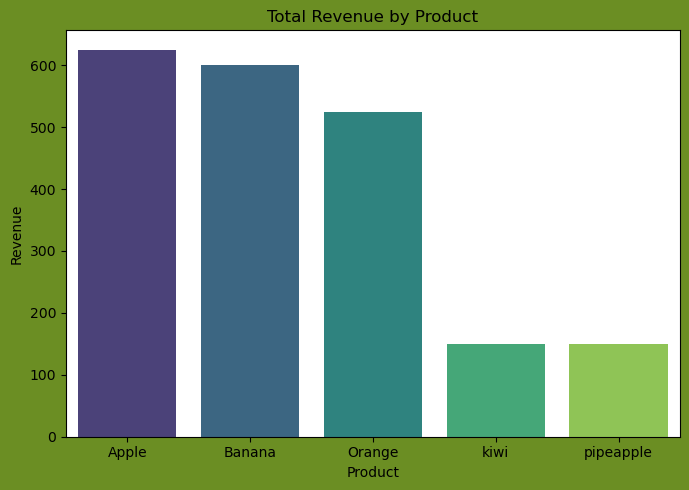

In [44]:
# product and total_revenue
plt.figure(figsize=(7, 5), facecolor="#6B8E23")
sns.barplot(data=df, x="product", y="total_revenue", palette="viridis")
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig(r"C:\Users\Admin\Desktop\Elevate_labs_intenship\fruit_chart.png")
plt.show()